# Overfitting és regularizációs technikák

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

Az alábbi kísérlethez szinusz formájú mintázatban ismétlődő adatokat fogunk generálni. Ehhez $2\pi$ hosszan mintavételezünk, és kiszámoljuk az adott tartományhoz tartozó értékeket.

Az egyes értékekhez - és a mintavételezési rátához is generálunk egy minimális zajt, előbbi esetén pozitív erősítést.

Megjegyzés: validációs halmazt ezúttal nem hozunk létre.

In [3]:
num = int(2*10*3.14)
X = np.array([0.1 * i + 0.25 * (0.01 * random.randint(0,100)) for i in range(1, num)])
Y = np.array([np.sin(x) + 0.75 * (0.01 * random.randint(0,100) - 0.5) for x in X])

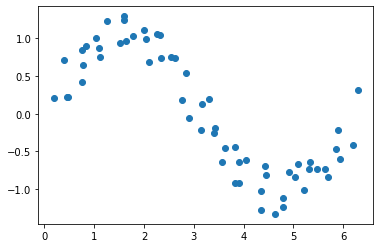

In [4]:
plt.scatter(X,Y)
plt.show()

Előző félévben említettük, hogy az adatok standardizálása nagyban segíti a tanítást - az egyszerűség kedvéért ezt most átlépjük, de ne feledkezzünk meg erről a lépésről. Ha ezt használnánk, akkor a tesztadatokkal ugyanezen skálával kellene dolgozni!

In [5]:
#X = X / (X.max()-X.min())
#Y = Y / num

$X$ és $Y$ *ndarray*ek alakját vizsgálva kiderül, hogy valójában nem mátrixok, hanem vektorok. A *np.reshape()* metódus segítségével alakítsuk át 2D mátrixokká, ahol a második dimenzió hossza konstans $1$.

In [6]:
print(X.shape)
print(Y.shape)
X = np.reshape(X, (X.shape[0], 1))
Y = np.reshape(Y, (Y.shape[0], 1))
print(X.shape)
print(Y.shape)

(61,)
(61,)
(61, 1)
(61, 1)


Építsünk egyszerű neurális hálózatot pár rejtett réteggel! 

Mivel tipikusan regressziós problémát definiáltunk, ezért triviális lehet minden réteg aktivációs függvényének *ReLU*t választani. Nem árt azonban óvatosnak lenni, hisz így lehetnek esetek, amikor a *dead ReLU* problémával találkozunk: a neuronok egész egyszerűen nem fognak aktiválni, és a zéró értékhez tartozó lokális optimumban ragadnak.

Ezen segíthetünk egy alacsonyabb *learning_rate* értékkel, vagy más típusú aktivációval, például *leaky ReLU*val.

Az optimizer lehet a jól bevált *Adam*, a veszteségfüggvényt definiáljuk átlagos négyzetes hibaként, vagy átlagos abszolút hibaként.

In [7]:
from keras import Sequential
from keras.callbacks import Callback
from keras.layers import Dense
from keras.layers.advanced_activations import LeakyReLU
    
input_params = X.shape[1]
    
model = Sequential()
model.add(Dense(input_params, input_shape=(input_params, )))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(100))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(100))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(10))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(10))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(1))
model.add(LeakyReLU(alpha=0.3))

model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['mae'])

### Túlilleszkedés

Tanítsuk a hálózatot (indokolatlanul) magas epochszámon keresztül, a tanítás során alkalmazott batch-ek mérete pedig egyezzen meg az adatok számával, így sokkal gyorsabb lesz a művelet.

In [8]:
model.fit(X,Y,batch_size=num,epochs=10000)

Epoch 1/10000
1/1 [==============================] - 1s 1s/step - loss: 0.7773 - mae: 0.7773
Epoch 2/10000
1/1 [==============================] - 0s 999us/step - loss: 0.6993 - mae: 0.6993
Epoch 3/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.6738 - mae: 0.6738
Epoch 4/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.6533 - mae: 0.6533
Epoch 5/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.6390 - mae: 0.6390
Epoch 6/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.6287 - mae: 0.6287
Epoch 7/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.6211 - mae: 0.6211
Epoch 8/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.6157 - mae: 0.6157
Epoch 9/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.6109 - mae: 0.6109
Epoch 10/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.6065 - mae: 0.6065
Epoch 11/10000
1/1 [==============================] 

1/1 [==============================] - 0s 1000us/step - loss: 0.2874 - mae: 0.2874
Epoch 87/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.2868 - mae: 0.2868
Epoch 88/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.2839 - mae: 0.2839
Epoch 89/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.2807 - mae: 0.2807
Epoch 90/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.2819 - mae: 0.2819
Epoch 91/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.2837 - mae: 0.2837
Epoch 92/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.2805 - mae: 0.2805
Epoch 93/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.2848 - mae: 0.2848
Epoch 94/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.2876 - mae: 0.2876
Epoch 95/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.2790 - mae: 0.2790
Epoch 96/10000
1/1 [==============================] - 0s 1ms/s

1/1 [==============================] - 0s 999us/step - loss: 0.2563 - mae: 0.2563
Epoch 172/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.2563 - mae: 0.2563
Epoch 173/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.2562 - mae: 0.2562
Epoch 174/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.2561 - mae: 0.2561
Epoch 175/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.2558 - mae: 0.2558
Epoch 176/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.2557 - mae: 0.2557
Epoch 177/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.2554 - mae: 0.2554
Epoch 178/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.2555 - mae: 0.2555
Epoch 179/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.2554 - mae: 0.2554
Epoch 180/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.2552 - mae: 0.2552
Epoch 181/10000
1/1 [==============================] -

1/1 [==============================] - 0s 1000us/step - loss: 0.2463 - mae: 0.2463
Epoch 257/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.2461 - mae: 0.2461
Epoch 258/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.2457 - mae: 0.2457
Epoch 259/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.2460 - mae: 0.2460
Epoch 260/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.2457 - mae: 0.2457
Epoch 261/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.2454 - mae: 0.2454
Epoch 262/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.2453 - mae: 0.2453
Epoch 263/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.2453 - mae: 0.2453
Epoch 264/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.2450 - mae: 0.2450
Epoch 265/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.2450 - mae: 0.2450
Epoch 266/10000
1/1 [==========================

1/1 [==============================] - 0s 1ms/step - loss: 0.2347 - mae: 0.2347
Epoch 341/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.2344 - mae: 0.2344
Epoch 342/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.2342 - mae: 0.2342
Epoch 343/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.2341 - mae: 0.2341
Epoch 344/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.2339 - mae: 0.2339
Epoch 345/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.2337 - mae: 0.2337
Epoch 346/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.2335 - mae: 0.2335
Epoch 347/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.2335 - mae: 0.2335
Epoch 348/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.2333 - mae: 0.2333
Epoch 349/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.2330 - mae: 0.2330
Epoch 350/10000
1/1 [==============================] 

Epoch 425/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.2195 - mae: 0.2195
Epoch 426/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.2194 - mae: 0.2194
Epoch 427/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.2188 - mae: 0.2188
Epoch 428/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.2192 - mae: 0.2192
Epoch 429/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.2191 - mae: 0.2191
Epoch 430/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.2188 - mae: 0.2188
Epoch 431/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.2183 - mae: 0.2183
Epoch 432/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.2184 - mae: 0.2184
Epoch 433/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.2183 - mae: 0.2183
Epoch 434/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.2181 - mae: 0.2181
Epoch 435/10000
1/1 [=============

1/1 [==============================] - 0s 2ms/step - loss: 0.1998 - mae: 0.1998
Epoch 510/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.2007 - mae: 0.2007
Epoch 511/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1989 - mae: 0.1989
Epoch 512/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.2007 - mae: 0.2007
Epoch 513/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1990 - mae: 0.1990
Epoch 514/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1993 - mae: 0.1993
Epoch 515/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1973 - mae: 0.1973
Epoch 516/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1977 - mae: 0.1977
Epoch 517/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1977 - mae: 0.1977
Epoch 518/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1987 - mae: 0.1987
Epoch 519/10000
1/1 [=============================

1/1 [==============================] - 0s 1000us/step - loss: 0.1851 - mae: 0.1851
Epoch 595/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1791 - mae: 0.1791
Epoch 596/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1759 - mae: 0.1759
Epoch 597/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1791 - mae: 0.1791
Epoch 598/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1787 - mae: 0.1787
Epoch 599/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1761 - mae: 0.1761
Epoch 600/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1757 - mae: 0.1757
Epoch 601/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1802 - mae: 0.1802
Epoch 602/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1835 - mae: 0.1835
Epoch 603/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1866 - mae: 0.1866
Epoch 604/10000
1/1 [===========================

1/1 [==============================] - 0s 1000us/step - loss: 0.1654 - mae: 0.1654
Epoch 679/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1673 - mae: 0.1673
Epoch 680/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1645 - mae: 0.1645
Epoch 681/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1659 - mae: 0.1659
Epoch 682/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1661 - mae: 0.1661
Epoch 683/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1655 - mae: 0.1655
Epoch 684/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1651 - mae: 0.1651
Epoch 685/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1645 - mae: 0.1645
Epoch 686/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1647 - mae: 0.1647
Epoch 687/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1646 - mae: 0.1646
Epoch 688/10000
1/1 [==============================] 

1/1 [==============================] - 0s 1ms/step - loss: 0.1750 - mae: 0.1750
Epoch 764/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1612 - mae: 0.1612
Epoch 765/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1748 - mae: 0.1748
Epoch 766/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1658 - mae: 0.1658
Epoch 767/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1686 - mae: 0.1686
Epoch 768/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1687 - mae: 0.1687
Epoch 769/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1639 - mae: 0.1639
Epoch 770/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1738 - mae: 0.1738
Epoch 771/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1595 - mae: 0.1595
Epoch 772/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1649 - mae: 0.1649
Epoch 773/10000
1/1 [==============================] 

1/1 [==============================] - 0s 1ms/step - loss: 0.1671 - mae: 0.1671
Epoch 848/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1593 - mae: 0.1593
Epoch 849/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1657 - mae: 0.1657
Epoch 850/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1584 - mae: 0.1584
Epoch 851/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1659 - mae: 0.1659
Epoch 852/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1621 - mae: 0.1621
Epoch 853/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1653 - mae: 0.1653
Epoch 854/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1586 - mae: 0.1586
Epoch 855/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1657 - mae: 0.1657
Epoch 856/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1616 - mae: 0.1616
Epoch 857/10000
1/1 [==========================

1/1 [==============================] - 0s 2ms/step - loss: 0.1678 - mae: 0.1678
Epoch 932/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1617 - mae: 0.1617
Epoch 933/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1665 - mae: 0.1665
Epoch 934/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1586 - mae: 0.1586
Epoch 935/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1645 - mae: 0.1645
Epoch 936/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1586 - mae: 0.1586
Epoch 937/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1662 - mae: 0.1662
Epoch 938/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1596 - mae: 0.1596
Epoch 939/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1641 - mae: 0.1641
Epoch 940/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1659 - mae: 0.1659
Epoch 941/10000
1/1 [=======================

1/1 [==============================] - 0s 1ms/step - loss: 0.1565 - mae: 0.1565
Epoch 1016/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1568 - mae: 0.1568
Epoch 1017/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1562 - mae: 0.1562
Epoch 1018/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1573 - mae: 0.1573
Epoch 1019/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1567 - mae: 0.1567
Epoch 1020/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1572 - mae: 0.1572
Epoch 1021/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1583 - mae: 0.1583
Epoch 1022/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1597 - mae: 0.1597
Epoch 1023/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1569 - mae: 0.1569
Epoch 1024/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1607 - mae: 0.1607
Epoch 1025/10000
1/1 [================

1/1 [==============================] - 0s 1ms/step - loss: 0.1596 - mae: 0.1596
Epoch 1100/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1573 - mae: 0.1573
Epoch 1101/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1586 - mae: 0.1586
Epoch 1102/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1591 - mae: 0.1591
Epoch 1103/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1604 - mae: 0.1604
Epoch 1104/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1568 - mae: 0.1568
Epoch 1105/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1575 - mae: 0.1575
Epoch 1106/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1602 - mae: 0.1602
Epoch 1107/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1609 - mae: 0.1609
Epoch 1108/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1567 - mae: 0.1567
Epoch 1109/10000
1/1 [==================

1/1 [==============================] - 0s 999us/step - loss: 0.1578 - mae: 0.1578
Epoch 1184/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1557 - mae: 0.1557
Epoch 1185/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1588 - mae: 0.1588
Epoch 1186/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1582 - mae: 0.1582
Epoch 1187/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1612 - mae: 0.1612
Epoch 1188/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1568 - mae: 0.1568
Epoch 1189/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1600 - mae: 0.1600
Epoch 1190/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1564 - mae: 0.1564
Epoch 1191/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1570 - mae: 0.1570
Epoch 1192/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1561 - mae: 0.1561
Epoch 1193/10000
1/1 [====================

Epoch 1267/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1562 - mae: 0.1562
Epoch 1268/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1565 - mae: 0.1565
Epoch 1269/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1572 - mae: 0.1572
Epoch 1270/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1565 - mae: 0.1565
Epoch 1271/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1570 - mae: 0.1570
Epoch 1272/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1569 - mae: 0.1569
Epoch 1273/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1560 - mae: 0.1560
Epoch 1274/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1560 - mae: 0.1560
Epoch 1275/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1557 - mae: 0.1557
Epoch 1276/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1569 - mae: 0.1569
Epoch 1277/10000
1/1 [========

1/1 [==============================] - 0s 1ms/step - loss: 0.1569 - mae: 0.1569
Epoch 1351/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1616 - mae: 0.1616
Epoch 1352/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1565 - mae: 0.1565
Epoch 1353/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1596 - mae: 0.1596
Epoch 1354/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1568 - mae: 0.1568
Epoch 1355/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1578 - mae: 0.1578
Epoch 1356/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1558 - mae: 0.1558
Epoch 1357/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1558 - mae: 0.1558
Epoch 1358/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1561 - mae: 0.1561
Epoch 1359/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1559 - mae: 0.1559
Epoch 1360/10000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.1560 - mae: 0.1560
Epoch 1434/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1556 - mae: 0.1556
Epoch 1435/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1566 - mae: 0.1566
Epoch 1436/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1555 - mae: 0.1555
Epoch 1437/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1582 - mae: 0.1582
Epoch 1438/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1550 - mae: 0.1550
Epoch 1439/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1558 - mae: 0.1558
Epoch 1440/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1551 - mae: 0.1551
Epoch 1441/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1557 - mae: 0.1557
Epoch 1442/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1549 - mae: 0.1549
Epoch 1443/10000
1/1 [===========

1/1 [==============================] - 0s 1000us/step - loss: 0.1600 - mae: 0.1600
Epoch 1517/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1569 - mae: 0.1569
Epoch 1518/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1562 - mae: 0.1562
Epoch 1519/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1593 - mae: 0.1593
Epoch 1520/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1571 - mae: 0.1571
Epoch 1521/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1608 - mae: 0.1608
Epoch 1522/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1558 - mae: 0.1558
Epoch 1523/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1634 - mae: 0.1634
Epoch 1524/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1552 - mae: 0.1552
Epoch 1525/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1629 - mae: 0.1629
Epoch 1526/10000
1/1 [==============

Epoch 1600/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1553 - mae: 0.1553
Epoch 1601/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1570 - mae: 0.1570
Epoch 1602/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1574 - mae: 0.1574
Epoch 1603/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1557 - mae: 0.1557
Epoch 1604/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1593 - mae: 0.1593
Epoch 1605/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1577 - mae: 0.1577
Epoch 1606/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1577 - mae: 0.1577
Epoch 1607/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1560 - mae: 0.1560
Epoch 1608/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1578 - mae: 0.1578
Epoch 1609/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1558 - mae: 0.1558
Epoch 1610/10000
1/1 [======

1/1 [==============================] - 0s 999us/step - loss: 0.1566 - mae: 0.1566
Epoch 1684/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1558 - mae: 0.1558
Epoch 1685/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1600 - mae: 0.1600
Epoch 1686/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1568 - mae: 0.1568
Epoch 1687/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1614 - mae: 0.1614
Epoch 1688/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1571 - mae: 0.1571
Epoch 1689/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1623 - mae: 0.1623
Epoch 1690/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1572 - mae: 0.1572
Epoch 1691/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1588 - mae: 0.1588
Epoch 1692/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1559 - mae: 0.1559
Epoch 1693/10000
1/1 [================

1/1 [==============================] - 0s 2ms/step - loss: 0.1612 - mae: 0.1612
Epoch 1767/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1555 - mae: 0.1555
Epoch 1768/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1573 - mae: 0.1573
Epoch 1769/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1582 - mae: 0.1582
Epoch 1770/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1572 - mae: 0.1572
Epoch 1771/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1561 - mae: 0.1561
Epoch 1772/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1552 - mae: 0.1552
Epoch 1773/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1582 - mae: 0.1582
Epoch 1774/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1544 - mae: 0.1544
Epoch 1775/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1548 - mae: 0.1548
Epoch 1776/10000
1/1 [==================

Epoch 1850/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1546 - mae: 0.1546
Epoch 1851/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1555 - mae: 0.1555
Epoch 1852/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1545 - mae: 0.1545
Epoch 1853/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1547 - mae: 0.1547
Epoch 1854/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1557 - mae: 0.1557
Epoch 1855/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1549 - mae: 0.1549
Epoch 1856/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1546 - mae: 0.1546
Epoch 1857/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1551 - mae: 0.1551
Epoch 1858/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1550 - mae: 0.1550
Epoch 1859/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1541 - mae: 0.1541
Epoch 1860/10000
1/1 [======

1/1 [==============================] - 0s 999us/step - loss: 0.1559 - mae: 0.1559
Epoch 1934/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1573 - mae: 0.1573
Epoch 1935/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1543 - mae: 0.1543
Epoch 1936/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1620 - mae: 0.1620
Epoch 1937/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1580 - mae: 0.1580
Epoch 1938/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1608 - mae: 0.1608
Epoch 1939/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1550 - mae: 0.1550
Epoch 1940/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1662 - mae: 0.1662
Epoch 1941/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1557 - mae: 0.1557
Epoch 1942/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1606 - mae: 0.1606
Epoch 1943/10000
1/1 [====================

1/1 [==============================] - 0s 999us/step - loss: 0.1536 - mae: 0.1536
Epoch 2018/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1535 - mae: 0.1535
Epoch 2019/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1537 - mae: 0.1537
Epoch 2020/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1534 - mae: 0.1534
Epoch 2021/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1539 - mae: 0.1539
Epoch 2022/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1543 - mae: 0.1543
Epoch 2023/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1538 - mae: 0.1538
Epoch 2024/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1539 - mae: 0.1539
Epoch 2025/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1541 - mae: 0.1541
Epoch 2026/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1539 - mae: 0.1539
Epoch 2027/10000
1/1 [==============

Epoch 2101/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1533 - mae: 0.1533
Epoch 2102/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1534 - mae: 0.1534
Epoch 2103/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1532 - mae: 0.1532
Epoch 2104/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1531 - mae: 0.1531
Epoch 2105/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1534 - mae: 0.1534
Epoch 2106/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1535 - mae: 0.1535
Epoch 2107/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1532 - mae: 0.1532
Epoch 2108/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1534 - mae: 0.1534
Epoch 2109/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1535 - mae: 0.1535
Epoch 2110/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1530 - mae: 0.1530
Epoch 2111/10000
1/

1/1 [==============================] - 0s 1ms/step - loss: 0.1533 - mae: 0.1533
Epoch 2185/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1535 - mae: 0.1535
Epoch 2186/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1539 - mae: 0.1539
Epoch 2187/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1535 - mae: 0.1535
Epoch 2188/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1538 - mae: 0.1538
Epoch 2189/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1533 - mae: 0.1533
Epoch 2190/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1541 - mae: 0.1541
Epoch 2191/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1537 - mae: 0.1537
Epoch 2192/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1543 - mae: 0.1543
Epoch 2193/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1544 - mae: 0.1544
Epoch 2194/10000
1/1 [===============

1/1 [==============================] - 0s 1ms/step - loss: 0.1543 - mae: 0.1543
Epoch 2268/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1547 - mae: 0.1547
Epoch 2269/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1543 - mae: 0.1543
Epoch 2270/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1535 - mae: 0.1535
Epoch 2271/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1554 - mae: 0.1554
Epoch 2272/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1536 - mae: 0.1536
Epoch 2273/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1579 - mae: 0.1579
Epoch 2274/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1579 - mae: 0.1579
Epoch 2275/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1532 - mae: 0.1532
Epoch 2276/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1554 - mae: 0.1554
Epoch 2277/10000
1/1 [====================

1/1 [==============================] - 0s 1ms/step - loss: 0.1603 - mae: 0.1603
Epoch 2351/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1542 - mae: 0.1542
Epoch 2352/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1572 - mae: 0.1572
Epoch 2353/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1551 - mae: 0.1551
Epoch 2354/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1607 - mae: 0.1607
Epoch 2355/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1596 - mae: 0.1596
Epoch 2356/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1669 - mae: 0.1669
Epoch 2357/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1536 - mae: 0.1536
Epoch 2358/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1690 - mae: 0.1690
Epoch 2359/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1584 - mae: 0.1584
Epoch 2360/10000
1/1 [================

1/1 [==============================] - 0s 999us/step - loss: 0.1530 - mae: 0.1530
Epoch 2434/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1534 - mae: 0.1534
Epoch 2435/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1537 - mae: 0.1537
Epoch 2436/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1540 - mae: 0.1540
Epoch 2437/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1529 - mae: 0.1529
Epoch 2438/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1538 - mae: 0.1538
Epoch 2439/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1541 - mae: 0.1541
Epoch 2440/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1541 - mae: 0.1541
Epoch 2441/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1542 - mae: 0.1542
Epoch 2442/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1530 - mae: 0.1530
Epoch 2443/10000
1/1 [============

1/1 [==============================] - 0s 1000us/step - loss: 0.1576 - mae: 0.1576
Epoch 2517/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1602 - mae: 0.1602
Epoch 2518/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1605 - mae: 0.1605
Epoch 2519/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1547 - mae: 0.1547
Epoch 2520/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1604 - mae: 0.1604
Epoch 2521/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1568 - mae: 0.1568
Epoch 2522/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1610 - mae: 0.1610
Epoch 2523/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1551 - mae: 0.1551
Epoch 2524/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1641 - mae: 0.1641
Epoch 2525/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1541 - mae: 0.1541
Epoch 2526/10000
1/1 [==============

1/1 [==============================] - 0s 1000us/step - loss: 0.1553 - mae: 0.1553
Epoch 2600/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1568 - mae: 0.1568
Epoch 2601/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1552 - mae: 0.1552
Epoch 2602/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1553 - mae: 0.1553
Epoch 2603/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1548 - mae: 0.1548
Epoch 2604/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1538 - mae: 0.1538
Epoch 2605/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1533 - mae: 0.1533
Epoch 2606/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1539 - mae: 0.1539
Epoch 2607/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1540 - mae: 0.1540
Epoch 2608/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1535 - mae: 0.1535
Epoch 2609/10000
1/1 [================

1/1 [==============================] - 0s 1000us/step - loss: 0.1541 - mae: 0.1541
Epoch 2684/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1557 - mae: 0.1557
Epoch 2685/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1534 - mae: 0.1534
Epoch 2686/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1614 - mae: 0.1614
Epoch 2687/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1555 - mae: 0.1555
Epoch 2688/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1575 - mae: 0.1575
Epoch 2689/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1549 - mae: 0.1549
Epoch 2690/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1576 - mae: 0.1576
Epoch 2691/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1540 - mae: 0.1540
Epoch 2692/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1582 - mae: 0.1582
Epoch 2693/10000
1/1 [==============

1/1 [==============================] - 0s 2ms/step - loss: 0.1526 - mae: 0.1526
Epoch 2767/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1527 - mae: 0.1527
Epoch 2768/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1525 - mae: 0.1525
Epoch 2769/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1527 - mae: 0.1527
Epoch 2770/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1528 - mae: 0.1528
Epoch 2771/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1526 - mae: 0.1526
Epoch 2772/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1523 - mae: 0.1523
Epoch 2773/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1525 - mae: 0.1525
Epoch 2774/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1536 - mae: 0.1536
Epoch 2775/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1529 - mae: 0.1529
Epoch 2776/10000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.1533 - mae: 0.1533
Epoch 2851/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1558 - mae: 0.1558
Epoch 2852/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1554 - mae: 0.1554
Epoch 2853/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1537 - mae: 0.1537
Epoch 2854/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1550 - mae: 0.1550
Epoch 2855/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1556 - mae: 0.1556
Epoch 2856/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1550 - mae: 0.1550
Epoch 2857/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1548 - mae: 0.1548
Epoch 2858/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1539 - mae: 0.1539
Epoch 2859/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1561 - mae: 0.1561
Epoch 2860/10000
1/1 [=================

1/1 [==============================] - 0s 2ms/step - loss: 0.1564 - mae: 0.1564
Epoch 2934/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1537 - mae: 0.1537
Epoch 2935/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1568 - mae: 0.1568
Epoch 2936/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1533 - mae: 0.1533
Epoch 2937/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1532 - mae: 0.1532
Epoch 2938/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1522 - mae: 0.1522
Epoch 2939/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1525 - mae: 0.1525
Epoch 2940/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1533 - mae: 0.1533
Epoch 2941/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1521 - mae: 0.1521
Epoch 2942/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1525 - mae: 0.1525
Epoch 2943/10000
1/1 [=======================

1/1 [==============================] - 0s 999us/step - loss: 0.1520 - mae: 0.1520
Epoch 3017/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1525 - mae: 0.1525
Epoch 3018/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1526 - mae: 0.1526
Epoch 3019/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1539 - mae: 0.1539
Epoch 3020/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1532 - mae: 0.1532
Epoch 3021/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1519 - mae: 0.1519
Epoch 3022/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1525 - mae: 0.1525
Epoch 3023/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1525 - mae: 0.1525
Epoch 3024/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1526 - mae: 0.1526
Epoch 3025/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1533 - mae: 0.1533
Epoch 3026/10000
1/1 [===================

1/1 [==============================] - 0s 1ms/step - loss: 0.1617 - mae: 0.1617
Epoch 3100/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1629 - mae: 0.1629
Epoch 3101/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1530 - mae: 0.1530
Epoch 3102/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1594 - mae: 0.1594
Epoch 3103/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1526 - mae: 0.1526
Epoch 3104/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1578 - mae: 0.1578
Epoch 3105/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1569 - mae: 0.1569
Epoch 3106/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1526 - mae: 0.1526
Epoch 3107/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1576 - mae: 0.1576
Epoch 3108/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1537 - mae: 0.1537
Epoch 3109/10000
1/1 [====================

1/1 [==============================] - 0s 2ms/step - loss: 0.1517 - mae: 0.1517
Epoch 3184/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1515 - mae: 0.1515
Epoch 3185/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1517 - mae: 0.1517
Epoch 3186/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1518 - mae: 0.1518
Epoch 3187/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1517 - mae: 0.1517
Epoch 3188/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1517 - mae: 0.1517
Epoch 3189/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1528 - mae: 0.1528
Epoch 3190/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1520 - mae: 0.1520
Epoch 3191/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1526 - mae: 0.1526
Epoch 3192/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1523 - mae: 0.1523
Epoch 3193/10000
1/1 [====================

1/1 [==============================] - 0s 2ms/step - loss: 0.1528 - mae: 0.1528
Epoch 3268/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1519 - mae: 0.1519
Epoch 3269/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1522 - mae: 0.1522
Epoch 3270/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1519 - mae: 0.1519
Epoch 3271/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1522 - mae: 0.1522
Epoch 3272/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1525 - mae: 0.1525
Epoch 3273/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1526 - mae: 0.1526
Epoch 3274/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1530 - mae: 0.1530
Epoch 3275/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1531 - mae: 0.1531
Epoch 3276/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1518 - mae: 0.1518
Epoch 3277/10000
1/1 [====================

1/1 [==============================] - 0s 1ms/step - loss: 0.1519 - mae: 0.1519
Epoch 3352/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1542 - mae: 0.1542
Epoch 3353/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1526 - mae: 0.1526
Epoch 3354/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1519 - mae: 0.1519
Epoch 3355/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1516 - mae: 0.1516
Epoch 3356/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1542 - mae: 0.1542
Epoch 3357/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1515 - mae: 0.1515
Epoch 3358/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1521 - mae: 0.1521
Epoch 3359/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1539 - mae: 0.1539
Epoch 3360/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1525 - mae: 0.1525
Epoch 3361/10000
1/1 [================

1/1 [==============================] - 0s 1ms/step - loss: 0.1520 - mae: 0.1520
Epoch 3435/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1512 - mae: 0.1512
Epoch 3436/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1518 - mae: 0.1518
Epoch 3437/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1513 - mae: 0.1513
Epoch 3438/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1521 - mae: 0.1521
Epoch 3439/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1533 - mae: 0.1533
Epoch 3440/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1516 - mae: 0.1516
Epoch 3441/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1524 - mae: 0.1524
Epoch 3442/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1513 - mae: 0.1513
Epoch 3443/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1533 - mae: 0.1533
Epoch 3444/10000
1/1 [====================

1/1 [==============================] - 0s 2ms/step - loss: 0.1534 - mae: 0.1534
Epoch 3519/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1522 - mae: 0.1522
Epoch 3520/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1528 - mae: 0.1528
Epoch 3521/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1526 - mae: 0.1526
Epoch 3522/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1531 - mae: 0.1531
Epoch 3523/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1511 - mae: 0.1511
Epoch 3524/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1520 - mae: 0.1520
Epoch 3525/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1516 - mae: 0.1516
Epoch 3526/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1520 - mae: 0.1520
Epoch 3527/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1515 - mae: 0.1515
Epoch 3528/10000
1/1 [====================

1/1 [==============================] - 0s 2ms/step - loss: 0.1571 - mae: 0.1571
Epoch 3602/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1512 - mae: 0.1512
Epoch 3603/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1569 - mae: 0.1569
Epoch 3604/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1542 - mae: 0.1542
Epoch 3605/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1533 - mae: 0.1533
Epoch 3606/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1559 - mae: 0.1559
Epoch 3607/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1558 - mae: 0.1558
Epoch 3608/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1569 - mae: 0.1569
Epoch 3609/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1522 - mae: 0.1522
Epoch 3610/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1577 - mae: 0.1577
Epoch 3611/10000
1/1 [===================

1/1 [==============================] - 0s 1ms/step - loss: 0.1524 - mae: 0.1524
Epoch 3686/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1602 - mae: 0.1602
Epoch 3687/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1564 - mae: 0.1564
Epoch 3688/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1537 - mae: 0.1537
Epoch 3689/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1579 - mae: 0.1579
Epoch 3690/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1533 - mae: 0.1533
Epoch 3691/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1608 - mae: 0.1608
Epoch 3692/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1540 - mae: 0.1540
Epoch 3693/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1580 - mae: 0.1580
Epoch 3694/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1535 - mae: 0.1535
Epoch 3695/10000
1/1 [=================

Epoch 3769/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1576 - mae: 0.1576
Epoch 3770/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1513 - mae: 0.1513
Epoch 3771/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1547 - mae: 0.1547
Epoch 3772/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1521 - mae: 0.1521
Epoch 3773/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1523 - mae: 0.1523
Epoch 3774/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1524 - mae: 0.1524
Epoch 3775/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1519 - mae: 0.1519
Epoch 3776/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1512 - mae: 0.1512
Epoch 3777/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1526 - mae: 0.1526
Epoch 3778/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1511 - mae: 0.1511
Epoch 3779/10000
1/1 [

1/1 [==============================] - 0s 2ms/step - loss: 0.1512 - mae: 0.1512
Epoch 3853/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1511 - mae: 0.1511
Epoch 3854/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1511 - mae: 0.1511
Epoch 3855/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1514 - mae: 0.1514
Epoch 3856/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1516 - mae: 0.1516
Epoch 3857/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1510 - mae: 0.1510
Epoch 3858/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1512 - mae: 0.1512
Epoch 3859/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1515 - mae: 0.1515
Epoch 3860/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1506 - mae: 0.1506
Epoch 3861/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1520 - mae: 0.1520
Epoch 3862/10000
1/1 [============

1/1 [==============================] - 0s 1ms/step - loss: 0.1509 - mae: 0.1509
Epoch 3937/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1511 - mae: 0.1511
Epoch 3938/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1508 - mae: 0.1508
Epoch 3939/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1511 - mae: 0.1511
Epoch 3940/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1511 - mae: 0.1511
Epoch 3941/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1516 - mae: 0.1516
Epoch 3942/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1513 - mae: 0.1513
Epoch 3943/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1528 - mae: 0.1528
Epoch 3944/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1551 - mae: 0.1551
Epoch 3945/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1514 - mae: 0.1514
Epoch 3946/10000
1/1 [===================

1/1 [==============================] - 0s 2ms/step - loss: 0.1506 - mae: 0.1506
Epoch 4021/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1508 - mae: 0.1508
Epoch 4022/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1511 - mae: 0.1511
Epoch 4023/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1499 - mae: 0.1499
Epoch 4024/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1519 - mae: 0.1519
Epoch 4025/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1511 - mae: 0.1511
Epoch 4026/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1513 - mae: 0.1513
Epoch 4027/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1504 - mae: 0.1504
Epoch 4028/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1510 - mae: 0.1510
Epoch 4029/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1503 - mae: 0.1503
Epoch 4030/10000
1/1 [===============

1/1 [==============================] - 0s 1000us/step - loss: 0.1503 - mae: 0.1503
Epoch 4104/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1512 - mae: 0.1512
Epoch 4105/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1511 - mae: 0.1511
Epoch 4106/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1527 - mae: 0.1527
Epoch 4107/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1502 - mae: 0.1502
Epoch 4108/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1516 - mae: 0.1516
Epoch 4109/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1522 - mae: 0.1522
Epoch 4110/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1507 - mae: 0.1507
Epoch 4111/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1514 - mae: 0.1514
Epoch 4112/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1524 - mae: 0.1524
Epoch 4113/10000
1/1 [==============

1/1 [==============================] - 0s 1ms/step - loss: 0.1513 - mae: 0.1513
Epoch 4187/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1504 - mae: 0.1504
Epoch 4188/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1508 - mae: 0.1508
Epoch 4189/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1521 - mae: 0.1521
Epoch 4190/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1506 - mae: 0.1506
Epoch 4191/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1516 - mae: 0.1516
Epoch 4192/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1514 - mae: 0.1514
Epoch 4193/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1506 - mae: 0.1506
Epoch 4194/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1502 - mae: 0.1502
Epoch 4195/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1507 - mae: 0.1507
Epoch 4196/10000
1/1 [======================

Epoch 4270/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1505 - mae: 0.1505
Epoch 4271/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1512 - mae: 0.1512
Epoch 4272/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1506 - mae: 0.1506
Epoch 4273/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1505 - mae: 0.1505
Epoch 4274/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1497 - mae: 0.1497
Epoch 4275/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1506 - mae: 0.1506
Epoch 4276/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1509 - mae: 0.1509
Epoch 4277/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1497 - mae: 0.1497
Epoch 4278/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1506 - mae: 0.1506
Epoch 4279/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1497 - mae: 0.1497
Epoch 4280/10000
1/1 [

1/1 [==============================] - 0s 1000us/step - loss: 0.1519 - mae: 0.1519
Epoch 4354/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1571 - mae: 0.1571
Epoch 4355/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1503 - mae: 0.1503
Epoch 4356/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1527 - mae: 0.1527
Epoch 4357/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1520 - mae: 0.1520
Epoch 4358/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1518 - mae: 0.1518
Epoch 4359/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1500 - mae: 0.1500
Epoch 4360/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1509 - mae: 0.1509
Epoch 4361/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1510 - mae: 0.1510
Epoch 4362/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1495 - mae: 0.1495
Epoch 4363/10000
1/1 [======

1/1 [==============================] - 0s 1000us/step - loss: 0.1490 - mae: 0.1490
Epoch 4437/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1510 - mae: 0.1510
Epoch 4438/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1495 - mae: 0.1495
Epoch 4439/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1490 - mae: 0.1490
Epoch 4440/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1497 - mae: 0.1497
Epoch 4441/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1509 - mae: 0.1509
Epoch 4442/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1512 - mae: 0.1512
Epoch 4443/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1505 - mae: 0.1505
Epoch 4444/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1511 - mae: 0.1511
Epoch 4445/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1495 - mae: 0.1495
Epoch 4446/10000
1/1 [================

1/1 [==============================] - 0s 2ms/step - loss: 0.1588 - mae: 0.1588
Epoch 4520/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1524 - mae: 0.1524
Epoch 4521/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1524 - mae: 0.1524
Epoch 4522/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1538 - mae: 0.1538
Epoch 4523/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1498 - mae: 0.1498
Epoch 4524/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1531 - mae: 0.1531
Epoch 4525/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1495 - mae: 0.1495
Epoch 4526/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1515 - mae: 0.1515
Epoch 4527/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1502 - mae: 0.1502
Epoch 4528/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1516 - mae: 0.1516
Epoch 4529/10000
1/1 [=================

1/1 [==============================] - 0s 1000us/step - loss: 0.1500 - mae: 0.1500
Epoch 4604/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1491 - mae: 0.1491
Epoch 4605/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1496 - mae: 0.1496
Epoch 4606/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1494 - mae: 0.1494
Epoch 4607/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1489 - mae: 0.1489
Epoch 4608/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1512 - mae: 0.1512
Epoch 4609/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1512 - mae: 0.1512
Epoch 4610/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1539 - mae: 0.1539
Epoch 4611/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1497 - mae: 0.1497
Epoch 4612/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1515 - mae: 0.1515
Epoch 4613/10000
1/1 [================

1/1 [==============================] - 0s 1ms/step - loss: 0.1500 - mae: 0.1500
Epoch 4688/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1482 - mae: 0.1482
Epoch 4689/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1509 - mae: 0.1509
Epoch 4690/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1510 - mae: 0.1510
Epoch 4691/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1520 - mae: 0.1520
Epoch 4692/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1486 - mae: 0.1486
Epoch 4693/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1507 - mae: 0.1507
Epoch 4694/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1510 - mae: 0.1510
Epoch 4695/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1512 - mae: 0.1512
Epoch 4696/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1506 - mae: 0.1506
Epoch 4697/10000
1/1 [======================

1/1 [==============================] - 0s 1ms/step - loss: 0.1492 - mae: 0.1492
Epoch 4772/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1499 - mae: 0.1499
Epoch 4773/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1489 - mae: 0.1489
Epoch 4774/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1507 - mae: 0.1507
Epoch 4775/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1489 - mae: 0.1489
Epoch 4776/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1518 - mae: 0.1518
Epoch 4777/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1498 - mae: 0.1498
Epoch 4778/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1510 - mae: 0.1510
Epoch 4779/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1492 - mae: 0.1492
Epoch 4780/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1527 - mae: 0.1527
Epoch 4781/10000
1/1 [====================

1/1 [==============================] - 0s 2ms/step - loss: 0.1518 - mae: 0.1518
Epoch 4856/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1497 - mae: 0.1497
Epoch 4857/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1525 - mae: 0.1525
Epoch 4858/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1499 - mae: 0.1499
Epoch 4859/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1493 - mae: 0.1493
Epoch 4860/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1517 - mae: 0.1517
Epoch 4861/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1506 - mae: 0.1506
Epoch 4862/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1510 - mae: 0.1510
Epoch 4863/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1491 - mae: 0.1491
Epoch 4864/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1513 - mae: 0.1513
Epoch 4865/10000
1/1 [==============

1/1 [==============================] - 0s 1ms/step - loss: 0.1480 - mae: 0.1480
Epoch 4940/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1480 - mae: 0.1480
Epoch 4941/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1474 - mae: 0.1474
Epoch 4942/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1482 - mae: 0.1482
Epoch 4943/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1501 - mae: 0.1501
Epoch 4944/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1491 - mae: 0.1491
Epoch 4945/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1496 - mae: 0.1496
Epoch 4946/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1508 - mae: 0.1508
Epoch 4947/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1493 - mae: 0.1493
Epoch 4948/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1509 - mae: 0.1509
Epoch 4949/10000
1/1 [====================

1/1 [==============================] - 0s 2ms/step - loss: 0.1479 - mae: 0.1479
Epoch 5024/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1505 - mae: 0.1505
Epoch 5025/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1489 - mae: 0.1489
Epoch 5026/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1486 - mae: 0.1486
Epoch 5027/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1523 - mae: 0.1523
Epoch 5028/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1492 - mae: 0.1492
Epoch 5029/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1514 - mae: 0.1514
Epoch 5030/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1517 - mae: 0.1517
Epoch 5031/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1516 - mae: 0.1516
Epoch 5032/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1526 - mae: 0.1526
Epoch 5033/10000
1/1 [=======================

1/1 [==============================] - 0s 1ms/step - loss: 0.1496 - mae: 0.1496
Epoch 5108/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1478 - mae: 0.1478
Epoch 5109/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1488 - mae: 0.1488
Epoch 5110/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1495 - mae: 0.1495
Epoch 5111/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1492 - mae: 0.1492
Epoch 5112/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1492 - mae: 0.1492
Epoch 5113/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1488 - mae: 0.1488
Epoch 5114/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1479 - mae: 0.1479
Epoch 5115/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1481 - mae: 0.1481
Epoch 5116/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1480 - mae: 0.1480
Epoch 5117/10000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.1532 - mae: 0.1532
Epoch 5192/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1499 - mae: 0.1499
Epoch 5193/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1540 - mae: 0.1540
Epoch 5194/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1493 - mae: 0.1493
Epoch 5195/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1570 - mae: 0.1570
Epoch 5196/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1498 - mae: 0.1498
Epoch 5197/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1679 - mae: 0.1679
Epoch 5198/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1522 - mae: 0.1522
Epoch 5199/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1586 - mae: 0.1586
Epoch 5200/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1567 - mae: 0.1567
Epoch 5201/10000
1/1 [======================

1/1 [==============================] - 0s 2ms/step - loss: 0.1495 - mae: 0.1495
Epoch 5276/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1481 - mae: 0.1481
Epoch 5277/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1481 - mae: 0.1481
Epoch 5278/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1485 - mae: 0.1485
Epoch 5279/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1469 - mae: 0.1469
Epoch 5280/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1474 - mae: 0.1474
Epoch 5281/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1472 - mae: 0.1472
Epoch 5282/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1479 - mae: 0.1479
Epoch 5283/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1468 - mae: 0.1468
Epoch 5284/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1469 - mae: 0.1469
Epoch 5285/10000
1/1 [===================

1/1 [==============================] - 0s 1000us/step - loss: 0.1488 - mae: 0.1488
Epoch 5360/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1512 - mae: 0.1512
Epoch 5361/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1483 - mae: 0.1483
Epoch 5362/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1479 - mae: 0.1479
Epoch 5363/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1524 - mae: 0.1524
Epoch 5364/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1497 - mae: 0.1497
Epoch 5365/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1500 - mae: 0.1500
Epoch 5366/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1501 - mae: 0.1501
Epoch 5367/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1516 - mae: 0.1516
Epoch 5368/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1490 - mae: 0.1490
Epoch 5369/10000
1/1 [======================

1/1 [==============================] - 0s 2ms/step - loss: 0.1495 - mae: 0.1495
Epoch 5444/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1491 - mae: 0.1491
Epoch 5445/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1475 - mae: 0.1475
Epoch 5446/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1477 - mae: 0.1477
Epoch 5447/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1487 - mae: 0.1487
Epoch 5448/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1495 - mae: 0.1495
Epoch 5449/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1511 - mae: 0.1511
Epoch 5450/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1491 - mae: 0.1491
Epoch 5451/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1472 - mae: 0.1472
Epoch 5452/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1493 - mae: 0.1493
Epoch 5453/10000
1/1 [=========================

1/1 [==============================] - 0s 1000us/step - loss: 0.1468 - mae: 0.1468
Epoch 5528/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1527 - mae: 0.1527
Epoch 5529/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1461 - mae: 0.1461
Epoch 5530/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1549 - mae: 0.1549
Epoch 5531/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1477 - mae: 0.1477
Epoch 5532/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1553 - mae: 0.1553
Epoch 5533/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1537 - mae: 0.1537
Epoch 5534/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1548 - mae: 0.1548
Epoch 5535/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1608 - mae: 0.1608
Epoch 5536/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1470 - mae: 0.1470
Epoch 5537/10000
1/1 [====================

1/1 [==============================] - 0s 1ms/step - loss: 0.1539 - mae: 0.1539
Epoch 5612/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1584 - mae: 0.1584
Epoch 5613/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1488 - mae: 0.1488
Epoch 5614/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1586 - mae: 0.1586
Epoch 5615/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1552 - mae: 0.1552
Epoch 5616/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1541 - mae: 0.1541
Epoch 5617/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1545 - mae: 0.1545
Epoch 5618/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1491 - mae: 0.1491
Epoch 5619/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1570 - mae: 0.1570
Epoch 5620/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1483 - mae: 0.1483
Epoch 5621/10000
1/1 [=================

1/1 [==============================] - 0s 2ms/step - loss: 0.1463 - mae: 0.1463
Epoch 5696/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1467 - mae: 0.1467
Epoch 5697/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1479 - mae: 0.1479
Epoch 5698/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1472 - mae: 0.1472
Epoch 5699/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1466 - mae: 0.1466
Epoch 5700/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1464 - mae: 0.1464
Epoch 5701/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1464 - mae: 0.1464
Epoch 5702/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1464 - mae: 0.1464
Epoch 5703/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1467 - mae: 0.1467
Epoch 5704/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1468 - mae: 0.1468
Epoch 5705/10000
1/1 [==============

1/1 [==============================] - 0s 1ms/step - loss: 0.1460 - mae: 0.1460
Epoch 5780/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1478 - mae: 0.1478
Epoch 5781/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1463 - mae: 0.1463
Epoch 5782/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1504 - mae: 0.1504
Epoch 5783/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1479 - mae: 0.1479
Epoch 5784/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1501 - mae: 0.1501
Epoch 5785/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1480 - mae: 0.1480
Epoch 5786/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1504 - mae: 0.1504
Epoch 5787/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1486 - mae: 0.1486
Epoch 5788/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1460 - mae: 0.1460
Epoch 5789/10000
1/1 [=========================

1/1 [==============================] - 0s 1ms/step - loss: 0.1484 - mae: 0.1484
Epoch 5864/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1459 - mae: 0.1459
Epoch 5865/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1503 - mae: 0.1503
Epoch 5866/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1483 - mae: 0.1483
Epoch 5867/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1487 - mae: 0.1487
Epoch 5868/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1471 - mae: 0.1471
Epoch 5869/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1487 - mae: 0.1487
Epoch 5870/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1463 - mae: 0.1463
Epoch 5871/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1490 - mae: 0.1490
Epoch 5872/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1485 - mae: 0.1485
Epoch 5873/10000
1/1 [================

1/1 [==============================] - 0s 3ms/step - loss: 0.1471 - mae: 0.1471
Epoch 5948/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1464 - mae: 0.1464
Epoch 5949/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1466 - mae: 0.1466
Epoch 5950/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1466 - mae: 0.1466
Epoch 5951/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1457 - mae: 0.1457
Epoch 5952/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1468 - mae: 0.1468
Epoch 5953/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1462 - mae: 0.1462
Epoch 5954/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1454 - mae: 0.1454
Epoch 5955/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1458 - mae: 0.1458
Epoch 5956/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1465 - mae: 0.1465
Epoch 5957/10000
1/1 [=========================

1/1 [==============================] - 0s 1ms/step - loss: 0.1455 - mae: 0.1455
Epoch 6032/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1490 - mae: 0.1490
Epoch 6033/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1456 - mae: 0.1456
Epoch 6034/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1472 - mae: 0.1472
Epoch 6035/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1465 - mae: 0.1465
Epoch 6036/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1487 - mae: 0.1487
Epoch 6037/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1470 - mae: 0.1470
Epoch 6038/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1462 - mae: 0.1462
Epoch 6039/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1467 - mae: 0.1467
Epoch 6040/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1472 - mae: 0.1472
Epoch 6041/10000
1/1 [======================

1/1 [==============================] - 0s 1ms/step - loss: 0.1472 - mae: 0.1472
Epoch 6116/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1521 - mae: 0.1521
Epoch 6117/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1476 - mae: 0.1476
Epoch 6118/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1487 - mae: 0.1487
Epoch 6119/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1472 - mae: 0.1472
Epoch 6120/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1518 - mae: 0.1518
Epoch 6121/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1482 - mae: 0.1482
Epoch 6122/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1516 - mae: 0.1516
Epoch 6123/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1489 - mae: 0.1489
Epoch 6124/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1511 - mae: 0.1511
Epoch 6125/10000
1/1 [===================

1/1 [==============================] - 0s 1ms/step - loss: 0.1466 - mae: 0.1466
Epoch 6200/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1447 - mae: 0.1447
Epoch 6201/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1482 - mae: 0.1482
Epoch 6202/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1463 - mae: 0.1463
Epoch 6203/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1479 - mae: 0.1479
Epoch 6204/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1463 - mae: 0.1463
Epoch 6205/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1452 - mae: 0.1452
Epoch 6206/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1465 - mae: 0.1465
Epoch 6207/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1463 - mae: 0.1463
Epoch 6208/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1449 - mae: 0.1449
Epoch 6209/10000
1/1 [======================

1/1 [==============================] - 0s 1ms/step - loss: 0.1462 - mae: 0.1462
Epoch 6284/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1452 - mae: 0.1452
Epoch 6285/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1466 - mae: 0.1466
Epoch 6286/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1450 - mae: 0.1450
Epoch 6287/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1466 - mae: 0.1466
Epoch 6288/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1465 - mae: 0.1465
Epoch 6289/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1457 - mae: 0.1457
Epoch 6290/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1457 - mae: 0.1457
Epoch 6291/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1453 - mae: 0.1453
Epoch 6292/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1482 - mae: 0.1482
Epoch 6293/10000
1/1 [======================

1/1 [==============================] - 0s 2ms/step - loss: 0.1464 - mae: 0.1464
Epoch 6368/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1459 - mae: 0.1459
Epoch 6369/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1459 - mae: 0.1459
Epoch 6370/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1459 - mae: 0.1459
Epoch 6371/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1465 - mae: 0.1465
Epoch 6372/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1461 - mae: 0.1461
Epoch 6373/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1452 - mae: 0.1452
Epoch 6374/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1451 - mae: 0.1451
Epoch 6375/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1462 - mae: 0.1462
Epoch 6376/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1457 - mae: 0.1457
Epoch 6377/10000
1/1 [=========================

1/1 [==============================] - 0s 1000us/step - loss: 0.1480 - mae: 0.1480
Epoch 6452/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1458 - mae: 0.1458
Epoch 6453/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1455 - mae: 0.1455
Epoch 6454/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1488 - mae: 0.1488
Epoch 6455/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1463 - mae: 0.1463
Epoch 6456/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1451 - mae: 0.1451
Epoch 6457/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1457 - mae: 0.1457
Epoch 6458/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1463 - mae: 0.1463
Epoch 6459/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1461 - mae: 0.1461
Epoch 6460/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1453 - mae: 0.1453
Epoch 6461/10000
1/1 [===================

1/1 [==============================] - 0s 1ms/step - loss: 0.1473 - mae: 0.1473
Epoch 6536/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1453 - mae: 0.1453
Epoch 6537/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1486 - mae: 0.1486
Epoch 6538/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1462 - mae: 0.1462
Epoch 6539/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1476 - mae: 0.1476
Epoch 6540/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1467 - mae: 0.1467
Epoch 6541/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1468 - mae: 0.1468
Epoch 6542/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1470 - mae: 0.1470
Epoch 6543/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1468 - mae: 0.1468
Epoch 6544/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1463 - mae: 0.1463
Epoch 6545/10000
1/1 [================

1/1 [==============================] - 0s 1ms/step - loss: 0.1516 - mae: 0.1516
Epoch 6620/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1458 - mae: 0.1458
Epoch 6621/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1467 - mae: 0.1467
Epoch 6622/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1479 - mae: 0.1479
Epoch 6623/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1480 - mae: 0.1480
Epoch 6624/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1454 - mae: 0.1454
Epoch 6625/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1476 - mae: 0.1476
Epoch 6626/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1473 - mae: 0.1473
Epoch 6627/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1484 - mae: 0.1484
Epoch 6628/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1452 - mae: 0.1452
Epoch 6629/10000
1/1 [==============

1/1 [==============================] - 0s 1000us/step - loss: 0.1459 - mae: 0.1459
Epoch 6704/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1456 - mae: 0.1456
Epoch 6705/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1458 - mae: 0.1458
Epoch 6706/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1447 - mae: 0.1447
Epoch 6707/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1464 - mae: 0.1464
Epoch 6708/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1447 - mae: 0.1447
Epoch 6709/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1450 - mae: 0.1450
Epoch 6710/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1467 - mae: 0.1467
Epoch 6711/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1456 - mae: 0.1456
Epoch 6712/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1479 - mae: 0.1479
Epoch 6713/10000
1/1 [================

1/1 [==============================] - 0s 1ms/step - loss: 0.1467 - mae: 0.1467
Epoch 6788/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1460 - mae: 0.1460
Epoch 6789/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1442 - mae: 0.1442
Epoch 6790/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1452 - mae: 0.1452
Epoch 6791/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1467 - mae: 0.1467
Epoch 6792/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1461 - mae: 0.1461
Epoch 6793/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1448 - mae: 0.1448
Epoch 6794/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1459 - mae: 0.1459
Epoch 6795/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1451 - mae: 0.1451
Epoch 6796/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1451 - mae: 0.1451
Epoch 6797/10000
1/1 [=========================

1/1 [==============================] - 0s 1000us/step - loss: 0.1470 - mae: 0.1470
Epoch 6872/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1496 - mae: 0.1496
Epoch 6873/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1468 - mae: 0.1468
Epoch 6874/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1468 - mae: 0.1468
Epoch 6875/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1480 - mae: 0.1480
Epoch 6876/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1517 - mae: 0.1517
Epoch 6877/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1456 - mae: 0.1456
Epoch 6878/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1493 - mae: 0.1493
Epoch 6879/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1500 - mae: 0.1500
Epoch 6880/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1479 - mae: 0.1479
Epoch 6881/10000
1/1 [===================

1/1 [==============================] - 0s 1ms/step - loss: 0.1465 - mae: 0.1465
Epoch 6956/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1466 - mae: 0.1466
Epoch 6957/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1497 - mae: 0.1497
Epoch 6958/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1457 - mae: 0.1457
Epoch 6959/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1495 - mae: 0.1495
Epoch 6960/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1440 - mae: 0.1440
Epoch 6961/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1500 - mae: 0.1500
Epoch 6962/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1437 - mae: 0.1437
Epoch 6963/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1533 - mae: 0.1533
Epoch 6964/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1475 - mae: 0.1475
Epoch 6965/10000
1/1 [===================

1/1 [==============================] - 0s 2ms/step - loss: 0.1455 - mae: 0.1455
Epoch 7040/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1498 - mae: 0.1498
Epoch 7041/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1460 - mae: 0.1460
Epoch 7042/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1475 - mae: 0.1475
Epoch 7043/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1476 - mae: 0.1476
Epoch 7044/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1470 - mae: 0.1470
Epoch 7045/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1494 - mae: 0.1494
Epoch 7046/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1446 - mae: 0.1446
Epoch 7047/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1524 - mae: 0.1524
Epoch 7048/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1443 - mae: 0.1443
Epoch 7049/10000
1/1 [======================

1/1 [==============================] - 0s 1ms/step - loss: 0.1446 - mae: 0.1446
Epoch 7124/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1472 - mae: 0.1472
Epoch 7125/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1464 - mae: 0.1464
Epoch 7126/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1453 - mae: 0.1453
Epoch 7127/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1469 - mae: 0.1469
Epoch 7128/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1437 - mae: 0.1437
Epoch 7129/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1462 - mae: 0.1462
Epoch 7130/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1449 - mae: 0.1449
Epoch 7131/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1463 - mae: 0.1463
Epoch 7132/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1460 - mae: 0.1460
Epoch 7133/10000
1/1 [======================

1/1 [==============================] - 0s 2ms/step - loss: 0.1441 - mae: 0.1441
Epoch 7208/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1435 - mae: 0.1435
Epoch 7209/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1432 - mae: 0.1432
Epoch 7210/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1440 - mae: 0.1440
Epoch 7211/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1445 - mae: 0.1445
Epoch 7212/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1443 - mae: 0.1443
Epoch 7213/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1436 - mae: 0.1436
Epoch 7214/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1437 - mae: 0.1437
Epoch 7215/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1444 - mae: 0.1444
Epoch 7216/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1434 - mae: 0.1434
Epoch 7217/10000
1/1 [=======================

1/1 [==============================] - 0s 1000us/step - loss: 0.1447 - mae: 0.1447
Epoch 7292/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1437 - mae: 0.1437
Epoch 7293/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1438 - mae: 0.1438
Epoch 7294/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1430 - mae: 0.1430
Epoch 7295/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1437 - mae: 0.1437
Epoch 7296/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1445 - mae: 0.1445
Epoch 7297/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1452 - mae: 0.1452
Epoch 7298/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1442 - mae: 0.1442
Epoch 7299/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1447 - mae: 0.1447
Epoch 7300/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1453 - mae: 0.1453
Epoch 7301/10000
1/1 [==============

1/1 [==============================] - 0s 1ms/step - loss: 0.1436 - mae: 0.1436
Epoch 7376/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1445 - mae: 0.1445
Epoch 7377/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1436 - mae: 0.1436
Epoch 7378/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1436 - mae: 0.1436
Epoch 7379/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1445 - mae: 0.1445
Epoch 7380/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1437 - mae: 0.1437
Epoch 7381/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1438 - mae: 0.1438
Epoch 7382/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1438 - mae: 0.1438
Epoch 7383/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1446 - mae: 0.1446
Epoch 7384/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1434 - mae: 0.1434
Epoch 7385/10000
1/1 [=========================

1/1 [==============================] - 0s 1ms/step - loss: 0.1444 - mae: 0.1444
Epoch 7460/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1449 - mae: 0.1449
Epoch 7461/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1454 - mae: 0.1454
Epoch 7462/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1430 - mae: 0.1430
Epoch 7463/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1456 - mae: 0.1456
Epoch 7464/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1475 - mae: 0.1475
Epoch 7465/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1438 - mae: 0.1438
Epoch 7466/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1470 - mae: 0.1470
Epoch 7467/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1458 - mae: 0.1458
Epoch 7468/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1458 - mae: 0.1458
Epoch 7469/10000
1/1 [======================

1/1 [==============================] - 0s 1000us/step - loss: 0.1435 - mae: 0.1435
Epoch 7544/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1459 - mae: 0.1459
Epoch 7545/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1434 - mae: 0.1434
Epoch 7546/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1463 - mae: 0.1463
Epoch 7547/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1485 - mae: 0.1485
Epoch 7548/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1472 - mae: 0.1472
Epoch 7549/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1443 - mae: 0.1443
Epoch 7550/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1451 - mae: 0.1451
Epoch 7551/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1444 - mae: 0.1444
Epoch 7552/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1445 - mae: 0.1445
Epoch 7553/10000
1/1 [====================

1/1 [==============================] - 0s 1ms/step - loss: 0.1452 - mae: 0.1452
Epoch 7628/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1447 - mae: 0.1447
Epoch 7629/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1448 - mae: 0.1448
Epoch 7630/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1445 - mae: 0.1445
Epoch 7631/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1458 - mae: 0.1458
Epoch 7632/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1422 - mae: 0.1422
Epoch 7633/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1525 - mae: 0.1525
Epoch 7634/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1433 - mae: 0.1433
Epoch 7635/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1533 - mae: 0.1533
Epoch 7636/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1443 - mae: 0.1443
Epoch 7637/10000
1/1 [=========================

1/1 [==============================] - 0s 1ms/step - loss: 0.1420 - mae: 0.1420
Epoch 7712/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1424 - mae: 0.1424
Epoch 7713/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1420 - mae: 0.1420
Epoch 7714/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1417 - mae: 0.1417
Epoch 7715/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1416 - mae: 0.1416
Epoch 7716/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1433 - mae: 0.1433
Epoch 7717/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1426 - mae: 0.1426
Epoch 7718/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1425 - mae: 0.1425
Epoch 7719/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1431 - mae: 0.1431
Epoch 7720/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1432 - mae: 0.1432
Epoch 7721/10000
1/1 [======================

1/1 [==============================] - 0s 1ms/step - loss: 0.1432 - mae: 0.1432
Epoch 7796/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1433 - mae: 0.1433
Epoch 7797/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1438 - mae: 0.1438
Epoch 7798/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1444 - mae: 0.1444
Epoch 7799/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1420 - mae: 0.1420
Epoch 7800/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1440 - mae: 0.1440
Epoch 7801/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1441 - mae: 0.1441
Epoch 7802/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1447 - mae: 0.1447
Epoch 7803/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1421 - mae: 0.1421
Epoch 7804/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1483 - mae: 0.1483
Epoch 7805/10000
1/1 [================

1/1 [==============================] - 0s 1ms/step - loss: 0.1435 - mae: 0.1435
Epoch 7880/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1426 - mae: 0.1426
Epoch 7881/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1429 - mae: 0.1429
Epoch 7882/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1445 - mae: 0.1445
Epoch 7883/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1434 - mae: 0.1434
Epoch 7884/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1420 - mae: 0.1420
Epoch 7885/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1466 - mae: 0.1466
Epoch 7886/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1436 - mae: 0.1436
Epoch 7887/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1467 - mae: 0.1467
Epoch 7888/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1466 - mae: 0.1466
Epoch 7889/10000
1/1 [======================

1/1 [==============================] - 0s 2ms/step - loss: 0.1446 - mae: 0.1446
Epoch 7964/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1430 - mae: 0.1430
Epoch 7965/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1456 - mae: 0.1456
Epoch 7966/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1461 - mae: 0.1461
Epoch 7967/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1414 - mae: 0.1414
Epoch 7968/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1432 - mae: 0.1432
Epoch 7969/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1462 - mae: 0.1462
Epoch 7970/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1424 - mae: 0.1424
Epoch 7971/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1435 - mae: 0.1435
Epoch 7972/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1437 - mae: 0.1437
Epoch 7973/10000
1/1 [===================

1/1 [==============================] - 0s 1000us/step - loss: 0.1419 - mae: 0.1419
Epoch 8048/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1421 - mae: 0.1421
Epoch 8049/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1420 - mae: 0.1420
Epoch 8050/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1424 - mae: 0.1424
Epoch 8051/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1437 - mae: 0.1437
Epoch 8052/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1429 - mae: 0.1429
Epoch 8053/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1423 - mae: 0.1423
Epoch 8054/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1425 - mae: 0.1425
Epoch 8055/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1423 - mae: 0.1423
Epoch 8056/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1429 - mae: 0.1429
Epoch 8057/10000
1/1 [================

1/1 [==============================] - 0s 1ms/step - loss: 0.1419 - mae: 0.1419
Epoch 8132/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1429 - mae: 0.1429
Epoch 8133/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1416 - mae: 0.1416
Epoch 8134/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1435 - mae: 0.1435
Epoch 8135/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1430 - mae: 0.1430
Epoch 8136/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1425 - mae: 0.1425
Epoch 8137/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1422 - mae: 0.1422
Epoch 8138/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1429 - mae: 0.1429
Epoch 8139/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1415 - mae: 0.1415
Epoch 8140/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1413 - mae: 0.1413
Epoch 8141/10000
1/1 [===================

1/1 [==============================] - 0s 1ms/step - loss: 0.1413 - mae: 0.1413
Epoch 8216/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1412 - mae: 0.1412
Epoch 8217/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1412 - mae: 0.1412
Epoch 8218/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1411 - mae: 0.1411
Epoch 8219/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1424 - mae: 0.1424
Epoch 8220/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1413 - mae: 0.1413
Epoch 8221/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1415 - mae: 0.1415
Epoch 8222/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1432 - mae: 0.1432
Epoch 8223/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1406 - mae: 0.1406
Epoch 8224/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1431 - mae: 0.1431
Epoch 8225/10000
1/1 [================

1/1 [==============================] - 0s 1000us/step - loss: 0.1410 - mae: 0.1410
Epoch 8300/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1431 - mae: 0.1431
Epoch 8301/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1412 - mae: 0.1412
Epoch 8302/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1481 - mae: 0.1481
Epoch 8303/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1411 - mae: 0.1411
Epoch 8304/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1466 - mae: 0.1466
Epoch 8305/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1410 - mae: 0.1410
Epoch 8306/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1469 - mae: 0.1469
Epoch 8307/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1416 - mae: 0.1416
Epoch 8308/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1463 - mae: 0.1463
Epoch 8309/10000
1/1 [==============

1/1 [==============================] - 0s 2ms/step - loss: 0.1428 - mae: 0.1428
Epoch 8384/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1401 - mae: 0.1401
Epoch 8385/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1424 - mae: 0.1424
Epoch 8386/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1412 - mae: 0.1412
Epoch 8387/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1433 - mae: 0.1433
Epoch 8388/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1424 - mae: 0.1424
Epoch 8389/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1413 - mae: 0.1413
Epoch 8390/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1432 - mae: 0.1432
Epoch 8391/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1411 - mae: 0.1411
Epoch 8392/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1420 - mae: 0.1420
Epoch 8393/10000
1/1 [==================

1/1 [==============================] - 0s 1ms/step - loss: 0.1411 - mae: 0.1411
Epoch 8468/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1465 - mae: 0.1465
Epoch 8469/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1407 - mae: 0.1407
Epoch 8470/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1468 - mae: 0.1468
Epoch 8471/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1441 - mae: 0.1441
Epoch 8472/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1445 - mae: 0.1445
Epoch 8473/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1433 - mae: 0.1433
Epoch 8474/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1442 - mae: 0.1442
Epoch 8475/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1445 - mae: 0.1445
Epoch 8476/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1465 - mae: 0.1465
Epoch 8477/10000
1/1 [====================

1/1 [==============================] - 0s 1ms/step - loss: 0.1419 - mae: 0.1419
Epoch 8552/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1430 - mae: 0.1430
Epoch 8553/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1448 - mae: 0.1448
Epoch 8554/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1411 - mae: 0.1411
Epoch 8555/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1430 - mae: 0.1430
Epoch 8556/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1444 - mae: 0.1444
Epoch 8557/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1420 - mae: 0.1420
Epoch 8558/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1416 - mae: 0.1416
Epoch 8559/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1448 - mae: 0.1448
Epoch 8560/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1412 - mae: 0.1412
Epoch 8561/10000
1/1 [==================

1/1 [==============================] - 0s 1ms/step - loss: 0.1490 - mae: 0.1490
Epoch 8636/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1427 - mae: 0.1427
Epoch 8637/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1546 - mae: 0.1546
Epoch 8638/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1417 - mae: 0.1417
Epoch 8639/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1486 - mae: 0.1486
Epoch 8640/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1454 - mae: 0.1454
Epoch 8641/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1418 - mae: 0.1418
Epoch 8642/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1445 - mae: 0.1445
Epoch 8643/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1404 - mae: 0.1404
Epoch 8644/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1412 - mae: 0.1412
Epoch 8645/10000
1/1 [================

1/1 [==============================] - 0s 1ms/step - loss: 0.1420 - mae: 0.1420
Epoch 8720/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1402 - mae: 0.1402
Epoch 8721/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1457 - mae: 0.1457
Epoch 8722/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1432 - mae: 0.1432
Epoch 8723/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1435 - mae: 0.1435
Epoch 8724/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1416 - mae: 0.1416
Epoch 8725/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1489 - mae: 0.1489
Epoch 8726/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1412 - mae: 0.1412
Epoch 8727/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1456 - mae: 0.1456
Epoch 8728/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1444 - mae: 0.1444
Epoch 8729/10000
1/1 [=======================

1/1 [==============================] - 0s 1000us/step - loss: 0.1406 - mae: 0.1406
Epoch 8804/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1392 - mae: 0.1392
Epoch 8805/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1402 - mae: 0.1402
Epoch 8806/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1394 - mae: 0.1394
Epoch 8807/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1401 - mae: 0.1401
Epoch 8808/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1403 - mae: 0.1403
Epoch 8809/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1391 - mae: 0.1391
Epoch 8810/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1391 - mae: 0.1391
Epoch 8811/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1387 - mae: 0.1387
Epoch 8812/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1396 - mae: 0.1396
Epoch 8813/10000
1/1 [====================

1/1 [==============================] - 0s 957us/step - loss: 0.1412 - mae: 0.1412
Epoch 8888/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1397 - mae: 0.1397
Epoch 8889/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1407 - mae: 0.1407
Epoch 8890/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1389 - mae: 0.1389
Epoch 8891/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1453 - mae: 0.1453
Epoch 8892/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1395 - mae: 0.1395
Epoch 8893/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1403 - mae: 0.1403
Epoch 8894/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1420 - mae: 0.1420
Epoch 8895/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1397 - mae: 0.1397
Epoch 8896/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1427 - mae: 0.1427
Epoch 8897/10000
1/1 [=============

1/1 [==============================] - 0s 1ms/step - loss: 0.1431 - mae: 0.1431
Epoch 8972/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1393 - mae: 0.1393
Epoch 8973/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1407 - mae: 0.1407
Epoch 8974/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1417 - mae: 0.1417
Epoch 8975/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1418 - mae: 0.1418
Epoch 8976/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1390 - mae: 0.1390
Epoch 8977/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1415 - mae: 0.1415
Epoch 8978/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1405 - mae: 0.1405
Epoch 8979/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1384 - mae: 0.1384
Epoch 8980/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1384 - mae: 0.1384
Epoch 8981/10000
1/1 [======================

1/1 [==============================] - 0s 1ms/step - loss: 0.1430 - mae: 0.1430
Epoch 9056/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1431 - mae: 0.1431
Epoch 9057/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1414 - mae: 0.1414
Epoch 9058/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1441 - mae: 0.1441
Epoch 9059/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1397 - mae: 0.1397
Epoch 9060/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1443 - mae: 0.1443
Epoch 9061/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1418 - mae: 0.1418
Epoch 9062/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1443 - mae: 0.1443
Epoch 9063/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1401 - mae: 0.1401
Epoch 9064/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1436 - mae: 0.1436
Epoch 9065/10000
1/1 [=========================

1/1 [==============================] - 0s 1ms/step - loss: 0.1413 - mae: 0.1413
Epoch 9140/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1384 - mae: 0.1384
Epoch 9141/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1403 - mae: 0.1403
Epoch 9142/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1391 - mae: 0.1391
Epoch 9143/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1406 - mae: 0.1406
Epoch 9144/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1423 - mae: 0.1423
Epoch 9145/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1407 - mae: 0.1407
Epoch 9146/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1412 - mae: 0.1412
Epoch 9147/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1415 - mae: 0.1415
Epoch 9148/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1409 - mae: 0.1409
Epoch 9149/10000
1/1 [=======================

1/1 [==============================] - 0s 1ms/step - loss: 0.1411 - mae: 0.1411
Epoch 9224/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1381 - mae: 0.1381
Epoch 9225/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1428 - mae: 0.1428
Epoch 9226/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1410 - mae: 0.1410
Epoch 9227/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1423 - mae: 0.1423
Epoch 9228/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1403 - mae: 0.1403
Epoch 9229/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1417 - mae: 0.1417
Epoch 9230/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1399 - mae: 0.1399
Epoch 9231/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1418 - mae: 0.1418
Epoch 9232/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1426 - mae: 0.1426
Epoch 9233/10000
1/1 [=================

1/1 [==============================] - 0s 1ms/step - loss: 0.1380 - mae: 0.1380
Epoch 9308/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1388 - mae: 0.1388
Epoch 9309/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1399 - mae: 0.1399
Epoch 9310/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1388 - mae: 0.1388
Epoch 9311/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1413 - mae: 0.1413
Epoch 9312/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1370 - mae: 0.1370
Epoch 9313/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1416 - mae: 0.1416
Epoch 9314/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1391 - mae: 0.1391
Epoch 9315/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1392 - mae: 0.1392
Epoch 9316/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1399 - mae: 0.1399
Epoch 9317/10000
1/1 [======================

1/1 [==============================] - 0s 1ms/step - loss: 0.1423 - mae: 0.1423
Epoch 9392/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1379 - mae: 0.1379
Epoch 9393/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1380 - mae: 0.1380
Epoch 9394/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1387 - mae: 0.1387
Epoch 9395/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1380 - mae: 0.1380
Epoch 9396/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1383 - mae: 0.1383
Epoch 9397/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1375 - mae: 0.1375
Epoch 9398/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1382 - mae: 0.1382
Epoch 9399/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1377 - mae: 0.1377
Epoch 9400/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1407 - mae: 0.1407
Epoch 9401/10000
1/1 [=======================

Epoch 9475/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1431 - mae: 0.1431
Epoch 9476/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1385 - mae: 0.1385
Epoch 9477/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1461 - mae: 0.1461
Epoch 9478/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1389 - mae: 0.1389
Epoch 9479/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1481 - mae: 0.1481
Epoch 9480/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1405 - mae: 0.1405
Epoch 9481/10000
1/1 [==============================] - 0s 0s/step - loss: 0.1426 - mae: 0.1426
Epoch 9482/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1408 - mae: 0.1408
Epoch 9483/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1402 - mae: 0.1402
Epoch 9484/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1435 - mae: 0.1435
Epoch 9485/10000

1/1 [==============================] - 0s 999us/step - loss: 0.1384 - mae: 0.1384
Epoch 9559/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1397 - mae: 0.1397
Epoch 9560/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1372 - mae: 0.1372
Epoch 9561/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1403 - mae: 0.1403
Epoch 9562/10000
1/1 [==============================] - 0s 998us/step - loss: 0.1380 - mae: 0.1380
Epoch 9563/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1400 - mae: 0.1400
Epoch 9564/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1402 - mae: 0.1402
Epoch 9565/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1395 - mae: 0.1395
Epoch 9566/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1397 - mae: 0.1397
Epoch 9567/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1413 - mae: 0.1413
Epoch 9568/10000
1/1 [============

1/1 [==============================] - 0s 1000us/step - loss: 0.1434 - mae: 0.1434
Epoch 9642/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1410 - mae: 0.1410
Epoch 9643/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1435 - mae: 0.1435
Epoch 9644/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1406 - mae: 0.1406
Epoch 9645/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1454 - mae: 0.1454
Epoch 9646/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1386 - mae: 0.1386
Epoch 9647/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1423 - mae: 0.1423
Epoch 9648/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1417 - mae: 0.1417
Epoch 9649/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1440 - mae: 0.1440
Epoch 9650/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1400 - mae: 0.1400
Epoch 9651/10000
1/1 [=============

1/1 [==============================] - 0s 2ms/step - loss: 0.1390 - mae: 0.1390
Epoch 9725/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1381 - mae: 0.1381
Epoch 9726/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1403 - mae: 0.1403
Epoch 9727/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1376 - mae: 0.1376
Epoch 9728/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1407 - mae: 0.1407
Epoch 9729/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1391 - mae: 0.1391
Epoch 9730/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1392 - mae: 0.1392
Epoch 9731/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1384 - mae: 0.1384
Epoch 9732/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1416 - mae: 0.1416
Epoch 9733/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1381 - mae: 0.1381
Epoch 9734/10000
1/1 [=================

1/1 [==============================] - 0s 1ms/step - loss: 0.1369 - mae: 0.1369
Epoch 9809/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1413 - mae: 0.1413
Epoch 9810/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1374 - mae: 0.1374
Epoch 9811/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1387 - mae: 0.1387
Epoch 9812/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1410 - mae: 0.1410
Epoch 9813/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1380 - mae: 0.1380
Epoch 9814/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1420 - mae: 0.1420
Epoch 9815/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1425 - mae: 0.1425
Epoch 9816/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1437 - mae: 0.1437
Epoch 9817/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1381 - mae: 0.1381
Epoch 9818/10000
1/1 [======================

1/1 [==============================] - 0s 3ms/step - loss: 0.1401 - mae: 0.1401
Epoch 9892/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1408 - mae: 0.1408
Epoch 9893/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1396 - mae: 0.1396
Epoch 9894/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1378 - mae: 0.1378
Epoch 9895/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1389 - mae: 0.1389
Epoch 9896/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1390 - mae: 0.1390
Epoch 9897/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1381 - mae: 0.1381
Epoch 9898/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1395 - mae: 0.1395
Epoch 9899/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1365 - mae: 0.1365
Epoch 9900/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1408 - mae: 0.1408
Epoch 9901/10000
1/1 [=================

1/1 [==============================] - 0s 1000us/step - loss: 0.1365 - mae: 0.1365
Epoch 9975/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.1439 - mae: 0.1439
Epoch 9976/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1367 - mae: 0.1367
Epoch 9977/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1460 - mae: 0.1460
Epoch 9978/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1374 - mae: 0.1374
Epoch 9979/10000
1/1 [==============================] - 0s 1000us/step - loss: 0.1445 - mae: 0.1445
Epoch 9980/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1407 - mae: 0.1407
Epoch 9981/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1434 - mae: 0.1434
Epoch 9982/10000
1/1 [==============================] - 0s 999us/step - loss: 0.1412 - mae: 0.1412
Epoch 9983/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.1405 - mae: 0.1405
Epoch 9984/10000
1/1 [===============

A tanítás után rajzoljuk ki az egyes értékekhez tartozó kimenetet. A lépték legyen $0.05$, a tartomány pedig $[-\pi/4; 2\pi + \pi/4]$.

In [9]:
pred_X = np.array([[0.05 * i] for i in range(int(-0.25*2*10*3.14), int(2.25*2*10*3.14))])
orig_pred_Y = model.predict(pred_X)

In [10]:
plt.scatter(X,Y)
plt.plot(pred_X, orig_pred_Y, 'r')
plt.ylim(-2, 2)
plt.show()

Jól kivehető, hogy a modell a tanítómintára illeszkedik, sőt, akár túlzott illeszkedésnek - vagy *túlilleszkedésnek* - nevezhetjük a jelenséget.

A gondot az okozza, hogy a modell nem általánosít elég jól: az adatok a zaj ellenére szinuszosan kellene hogy ismétlődjenek, a modell ezt pedig nem tanulta meg helyesen. Ennek oka lehet a kevés tanítóminta, vagy a mintához képesti sok tanítható paraméter.

Mi ezzel a gond? Sok esetben nem lehetséges *jelentősen* megnövelni a tanítóhalmaz méretét, a neuronszám csökkentése pedig a tanulóképesség csökkenéséhez (és végül *alulillesztés*hez) vezethet. Segítheti az általánosító-képesség fenntartását az is ha egyszerűen csökkentjük a tanítási epoch-számot: ekkor azonban meg kell becsülni, hogy mikor állítsuk le a tanítást.

Az overfitting elkerülésére többféle módszert is definiált a szakirodalom *regularizációs* módszerekként, a következőekben ezeket fogjuk áttekinteni.

A probléma egy általunk már ismert megközelítése, ha a teljes tanítóhalmazt szétbontjuk tanító és *validációs* adatokra, majd utóbbit nem használjuk tanításra, ehelyett a modell teljesítményét ellenőrizzük vele. Mivel a *validációs* halmaz elemeit nem használjuk tanításra, így amennyiben a modell elkezd túlilleszkedni, a validációs adatokra számolt loss nem kovergál tovább.

A validációs losst figyelve implementálhatunk egy korai leállítást, melyre a Kerasban definiáltak egy *EarlyStopping* nevű callbacket.

Ismert módszer az L1 vagy L2 regularizáció: mindkettő a gyökerében szeretné kezelni a problémát. A modell általánosítóképessége azért romolhat meg, mert a hálózat tanítható paraméterei "elszállnak". Megfigyelhető ugyanis, hogy a neuronok súly és eltolás paraméterei túlilleszkedés esetén vagy nagyon alacsonyak - tehát nem aktiválnak - vagy nagyon magasak - tehát mindig aktiválnak.

(Megjegyzés: ez *ReLU* aktivációk esetén overfittinget okoz, de könnyen beláthatjuk hogy például *sigmoid* aktiváció esetén egészen más jelenséget eredményezhet: a tanulás lelassulhat, a szélsőértékek környékére mozdult paraméterek ugyanazokat a neuronokat aktiválják, a hibavisszaterjesztéssel jelentéktelenül kicsi gradiens értékek térnek vissza. Ezt *gradiens felszívódás*nak, vagy angolosan *vanishing gradient* problémának nevezik.)

Az elszállt értékek kezelhetőek súlybüntetéssel: minál nagyobb az érték, annál nagyobb a bírság: pontosan ezt teszi az L1 és L2 regularizáció. Mindkét esetben egy $\lambda$ tényezővel (Keras default: $0.01$) vesszük figyelembe a súlyértékeket, és adjuk hozzá a veszteségfüggvényhez.

L1 esetén az abszolútértékek összegét vesszük, L2 esetén pedig a négyzetes összeget (innen ered a nevük, hisz előbbi az 1-es norma, utóbbi a 2-es norma).

Mivel a *loss* értékéhez büntetésként hozzáadjuk a nagy értékeket, a modell tanuláskor törekedni fog a különböző súlyértékek alacsonyan tartására. Ez több dolgot is eredményez: a modell egyrészt lassabban fog konvergálni, másrészt jobb általánosítóképessége lesz. De be kell lássuk, ettől még túlilleszkedhet: sok múlik a választott $\lambda$ értéken és a paraméterek számán is.

Más jellegű megközelítés a *Dropout* ötlete. Tételezzük fel, hogy a modell a következtetéshez az összes neuron aktivációját figyelembe veszi. Ha véletlenszerűen kiválasztva néhány neuront kivennénk a hálózatból, akkor a kimenet nyilván más lenne, esetleg hibás. Azonban ha már tanítás során esetenként "kiveszünk" a hálózatból véletlenszerűen néhány neuront, akkor a maradék minden esetben az ő pótlásukra is törekszik, azaz igyekszik *általánosítani*. A túlilleszkedés elkerülésére pedig pont erre a képességre van szükség.

### Early stopping

Ennélfogva a következő tanítást úgy fogjuk elvégezni, hogy bár meghatározunk egy magas epochszámot, de minden epoch végén megvizsgáljuk hogy a *loss* értéke mutat-e változást. Amennyiben (egy bizonyos időablakon belül) nem változott, akkor leállítjuk a tanítást.

Kezdésként újra definiálom teljesen ugyanazt a hálózatot, mivel a korai leállítás nem érinti az architektúrát.

In [11]:
model = Sequential()
model.add(Dense(input_params, input_shape=(input_params, )))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(100))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(100))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(10))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(10))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(1))
model.add(LeakyReLU(alpha=0.3))

model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['mae'])

Definiáljuk az *EarlyStopping* callbacket: a *validation_loss* értékét fogjuk figyelni, és amikor megszűnik a konvergencia, leállítjuk a tanítást.

Lásd a Keras dokumentációban: https://keras.io/callbacks/#earlystopping

In [12]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', min_delta=0, patience = 80)

Persze hogy legyen validációs veszteség, kell validációs adathalmaz is. Itt most csalok, mert eleve kevés adatom volt, így onnan leválasztani nehézkes - ehelyett a korábbi módszerrel generálok ritkább mintavételezéssel adatokat.

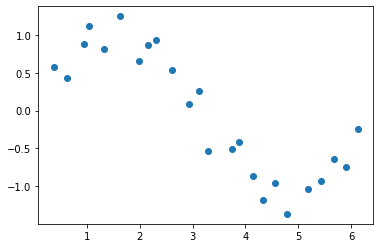

In [13]:
valid_num = int(2*4*3.14)
valid_X = np.array([0.25 * i + 0.25 * (0.01 * random.randint(0,100)) for i in range(1, valid_num)])
valid_Y = np.array([np.sin(x) + 0.75 * (0.01 * random.randint(0,100) - 0.5) for x in valid_X])

plt.scatter(valid_X,valid_Y)
plt.show()

valid_X = np.reshape(valid_X, (valid_X.shape[0], 1))
valid_Y = np.reshape(valid_Y, (valid_Y.shape[0], 1))

Tanítsuk a modellt legfeljebb 10000 epochon keresztül, állítsuk be a fentebb definiált callbacket, és a validációs adatokat.

In [14]:
hist = model.fit(X,Y,batch_size=num,epochs=10000,callbacks=[es],validation_data=(valid_X, valid_Y), verbose = 0)

Lássuk a predikciós görbét!

In [16]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

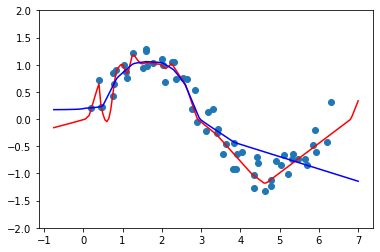

In [18]:
es_pred_Y = model.predict(pred_X)
plt.scatter(X,Y)
plt.plot(pred_X, orig_pred_Y, 'r')
plt.plot(pred_X, es_pred_Y, 'b')
plt.ylim(-2, 2)
plt.show()

### Regularizáció

A fentebb említett L1 és L2 regularizációk közötti különbség a normák alapján könnyen megadható: L2 norma jobban bünteti a nagyobb értékeket mint az L1, hisz előbbi a négyzetösszeget adja a losshoz, míg utóbbi az abszolút összeget. Ugyanez azonban a $[0;1]$ közötti értékek esetén azt is jelenti, hogy az L2 regularizáció négyzetes hibája az ezen tartományon levő értékeket kevésbé bünteti, mint az L1 technika esetén.

A gyakorlatban L2 elterjedtebb, L1 regularizációt jellemzők kiemelésére alkalmaznak.

Továbbiak: https://keras.io/regularizers/

In [19]:
model = Sequential()
model.add(Dense(input_params, input_shape=(input_params, ), kernel_regularizer='l2', bias_regularizer='l2'))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(100, kernel_regularizer='l2', bias_regularizer='l2'))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(100, kernel_regularizer='l2', bias_regularizer='l2'))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(10, kernel_regularizer='l2', bias_regularizer='l2'))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(10, kernel_regularizer='l2', bias_regularizer='l2'))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(1))
model.add(LeakyReLU(alpha=0.3))

model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['mae'])

Gyors megjegyzés: itt most kifejezetten a regularizáció hatását szeretnénk megvizsgálni, ezért a korai leállítást és a validációs adatok vizsgálatát elengedjük. Azonban valós esetben nyilván használjuk ki ha van több adatunk!

Arról nem is beszélve, hogy a két technika együtt még hatékonyabb az overfitting elkerülésére.

In [20]:
model.fit(X,Y,batch_size=num,epochs=10000, verbose = 0)

In [21]:
reg_pred_Y = model.predict(pred_X)

In [22]:
plt.scatter(X,Y)
plt.plot(pred_X, reg_pred_Y, color='orange')
plt.ylim(-2, 2)
plt.show()

### Dropout

A Kerasban rétegként került implementálásra a *Dropout*: Az egyes rejtett(!) rétegeket követően kell definiálni, és megadni a $[0; 1]$ közötti *rate* értéket, amely megadja hogy az egyes neuronok mekkora arányban legyenek kihagyva (avagy milyen valószínűséggel legyen egy neuron kihagyva).

Továbbiak: https://keras.io/layers/core/#dropout

In [26]:
from keras.layers.core import Dropout

model = Sequential()
model.add(Dense(input_params, input_shape=(input_params, )))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(100))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.3))
model.add(Dense(100))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.3))
model.add(Dense(10))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.3))
model.add(Dense(10))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.3))
model.add(Dense(1))
model.add(LeakyReLU(alpha=0.3))

model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['mae'])

Tanítás majd a szokásos grafikon kirajzolása következik...

In [27]:
model.fit(X,Y,batch_size=num,epochs=10000, verbose = 0)

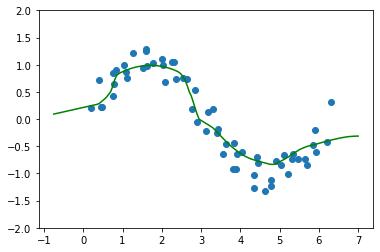

In [28]:
do_pred_Y = model.predict(pred_X)
plt.scatter(X,Y)
plt.plot(pred_X, do_pred_Y, 'g')
plt.ylim(-2, 2)
plt.show()

### Összefoglalás

Jelenítsük meg az eredményeinket közös grafikonon!

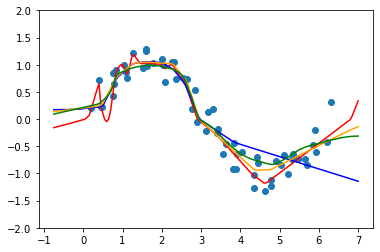

In [29]:
plt.scatter(X,Y)
plt.plot(pred_X, orig_pred_Y, 'r')
plt.plot(pred_X, es_pred_Y, 'b')
plt.plot(pred_X, reg_pred_Y, color='orange')
plt.plot(pred_X, do_pred_Y, 'g')
plt.ylim(-2, 2)
plt.show()

A túlillesztés kezelésére tehát többféle módszer is adott: megvizsgáltuk a korai leállítást, a súlycsökkentő (*weight decay*) regularizációs technikákat, valamint a Dropoutot. Ezen kívül persze hatással van az általánosítóképességre a paraméterek (rétegek, neuronok) számának csökkentése, valamint a tanítóadatok számának növelése.

Kérdésként felmerül, hogy melyik jobb? Melyiket használjuk általános esetben? Korábban már felmerült a regularizáció és az early stopping közös használata, amely nyilvánvalóan működőképes. 

Mi a helyzet a *weight decay* és *Dropout* technikák közös alkalmazásával? Valójában a kutatások (lásd Srivastava, Hinton és tsaik közös cikkét: http://jmlr.org/papers/volume15/srivastava14a.old/srivastava14a.pdf) azt mutatják, hogy a módszerek együttes alkalmazásával magas hatékonyság érhető el.

Zárásként teszteljük ezt a teóriát: együttesen alkalmazzuk az L2 regularizert, és a Dropoutot is.

In [30]:
model = Sequential()
model.add(Dense(input_params, input_shape=(input_params, ), kernel_regularizer='l2', bias_regularizer='l2'))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(100, kernel_regularizer='l2', bias_regularizer='l2'))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.5))
model.add(Dense(100, kernel_regularizer='l2', bias_regularizer='l2'))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.5))
model.add(Dense(10, kernel_regularizer='l2', bias_regularizer='l2'))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.5))
model.add(Dense(10, kernel_regularizer='l2', bias_regularizer='l2'))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(LeakyReLU(alpha=0.3))

model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['mae'])

Early stopping állítja meg a tanítást a validációs set alapján.

In [31]:
model.fit(X,Y,batch_size=num,epochs=10000,callbacks=[es],validation_data=(valid_X, valid_Y), verbose = 0)

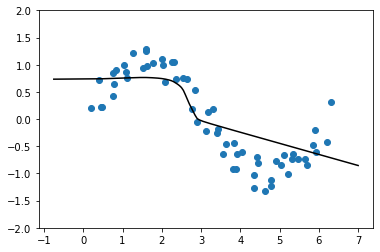

In [32]:
all_pred_Y = model.predict(pred_X)
plt.scatter(X,Y)
plt.plot(pred_X, all_pred_Y, color='black')
plt.ylim(-2, 2)
plt.show()

Ha úgy látjuk hogy ez így *underfitting*, akkor megpróbálkozhatunk early stopping nélküli változattal is:

In [37]:
model = Sequential()
model.add(Dense(input_params, input_shape=(input_params, ), kernel_regularizer='l2', bias_regularizer='l2'))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(100, kernel_regularizer='l2', bias_regularizer='l2'))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.3))
model.add(Dense(100, kernel_regularizer='l2', bias_regularizer='l2'))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.3))
model.add(Dense(10, kernel_regularizer='l2', bias_regularizer='l2'))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.3))
model.add(Dense(10, kernel_regularizer='l2', bias_regularizer='l2'))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.3))
model.add(Dense(1))
model.add(LeakyReLU(alpha=0.3))

model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['mae'])

In [39]:
model.fit(X,Y,batch_size=num,epochs=10000, verbose = 0)

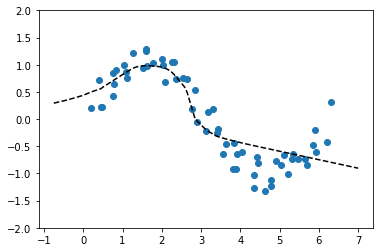

In [40]:
all_full_pred_Y = model.predict(pred_X)
plt.scatter(X,Y)
plt.plot(pred_X, all_full_pred_Y, color='black', linestyle='dashed')
plt.ylim(-2, 2)
plt.show()

És minden együtt:

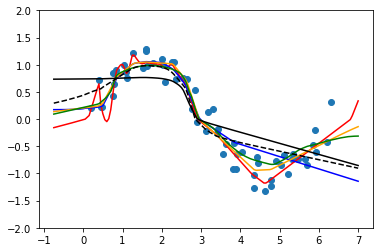

In [42]:
plt.scatter(X,Y)
plt.plot(pred_X, orig_pred_Y, 'r')
plt.plot(pred_X, es_pred_Y, 'b')
plt.plot(pred_X, reg_pred_Y, color='orange')
plt.plot(pred_X, do_pred_Y, 'g')
plt.plot(pred_X, all_pred_Y, color='black')
plt.plot(pred_X, all_full_pred_Y, color='black', linestyle='dashed')
plt.ylim(-2, 2)
plt.show()

Tanulságok:
- A túlillesztés egy olyan jelenség, amivel foglalkozni kell, előfordulása rendeltetésszerű
- Jellemzően akkor fordul elő, ha a tanítható paraméterek számához képest kevés számú tanítóminta van
- Ha több tanítóminta van, akkor az overfitting **később jelentkezik**
- Célszerű a tanítást leállítani, amikor úgy tűnik hogy elkezdődik a jelenség: early stopping
- Emellett több kezelési módszer is adott mint a súlycsökkentés (L1/L2 regularization), vagy a Dropout
- Ezek akár együtt is alkalmazhatóak, bár ahogy a fenti példa is mutatta, a feladat szintjéhez szükséges eszközzel próbálkozzunk, hisz ezen eszközök alkalmazásának eredményeképp a modell lassabban konvergál (akár *underfitting* is lehet az eredmény)